In [2]:
if "logger" in globals() and  len(logger.handlers) >= 1:
    # To suppress debug output from the logger defined in .ipython/profile_default/ipython_config.py
    logger.handlers.pop()

%load_ext autoreload
%autoreload 2

%matplotlib inline

import platform
BASEDIR = "/u/timoh/phd" if "freya" in platform.node() else ""

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))
display(HTML("<style>.output_html { display: block; margin-left: auto; margin-right: auto; }</style>"))

In [9]:
import sys
import numpy
import scipy
from matplotlib import pyplot

if "/tidalshocks/src" not in sys.path:
    sys.path.insert(0, "{}/tidalshocks/src".format(BASEDIR))
from mw_gc_observation import MwGcObservation

if "/supaharris" not in sys.path: 
    sys.path.insert(0, "{}/supaharris".format(BASEDIR))
from utils import parsec2arcmin

import logging
logging.getLogger("keyring").setLevel(logging.CRITICAL)
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)
logging.basicConfig(stream=sys.stdout, format="%(message)s")
logger = logging.getLogger(); logger.level = logging.INFO
for h in logger.handlers: h.setLevel(logger.level)

 Model scaled to: G = 1, M = 1, rt = 1

 Model properties: 
 ----------------- 
 phi0 =  8.58; g = 1.00
 Converged = True
 M =  1.000e+00; U = -4.266e+00; K = 2.133e+00; Q = 0.5000;  2Kr/Kt = 1.000
 rv/rh = 1.069; rh/r0 = 11.103; rt/r0 = 101.292; ra/rh = 9006670.067
limepy.limepy took 0.04 s
 sample r ...
 sample v ...
   set-up segments for velocity cdf ...
   compute cdf ...
   (rejection) sampling of k^3/2 values ...
   sample angles ...
 convert to cartesian coordinates ...
 done! 
       U: sample =  -4.2312e+00; model =  -4.2663e+00
       K: sample =   2.1153e+00; model =   2.1332e+00
       Q: sample =  -4.9993e-01; model =  -5.0000e-01
  2Kr/Kt: sample =       1.0014; model =       1.0000
limepy.sample took 0.58 s
convert to AMUSE took 0.00 s

limepy_to_amuse, pre-converter business
  G:         1.0 length**3 / (mass * time**2)
  com:       [-6.50521303491e-19, 1.08420217249e-18, 7.5894152074e-19] length
  comvel:    [-1.12757025938e-17, 0.0, 3.98986399475e-17] length * time**

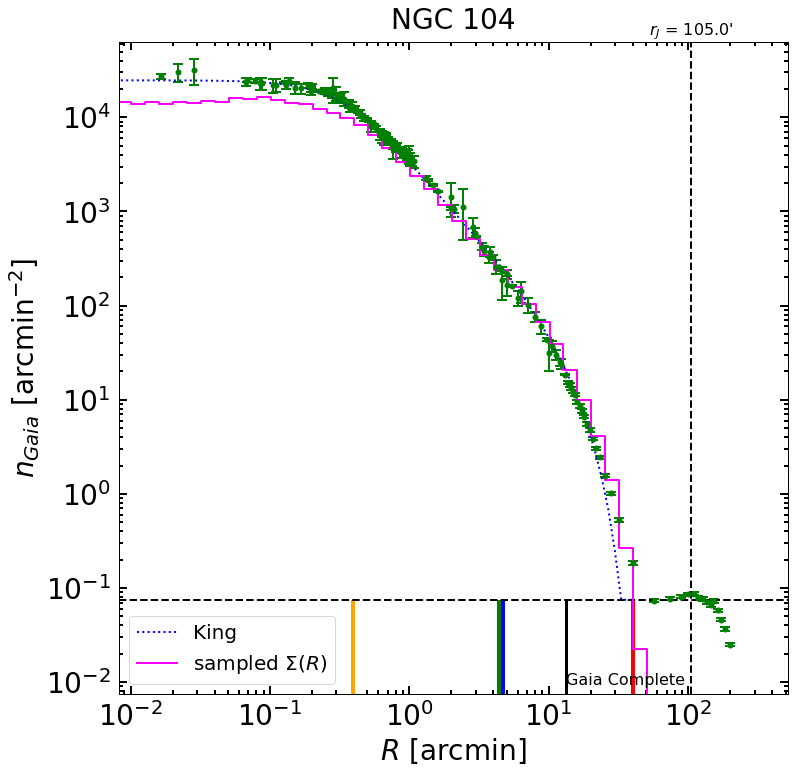


get_radial_profiles
  com:  [ -3.76704458e-17   3.76704458e-17   1.88352229e-17]
  comvel:  [ -5.23086913e-17  -5.50617804e-18   1.18382828e-16]
  Mtot:   107803.319 MSun
  Ekin:   5.24444842893e+42 J
  Epot:   -1.03966769372e+43 J
  Ekin/Epot: -0.5044350671451768
  Ltot:   [-21793.6591448, 28630.7447543, 2004.54095882] MSun * parsec**2 / Myr
  ptot:      [-5.76700241119e-12, -6.07052885389e-13, 1.30516370359e-11] MSun * parsec / Myr

get_radial_profiles took 0.00 s
get_radial_profiles took 0.99 s


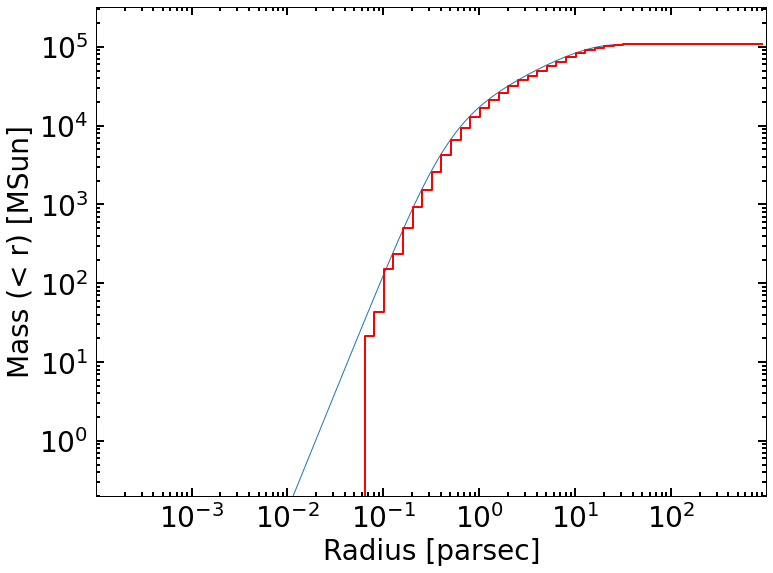

In [70]:
from amuse.units import units
from amuse.io import read_set_from_file

Nstars = 5000
Nbins = int(numpy.sqrt(Nstars))
obs = MwGcObservation(logger, "NGC 104")
king_model, king_limepy_sampled, king_amuse_sampled, king_converter = \
    obs.sample_deBoer2019_bestfit_king(Nstars=Nstars, verbose=True)

fig, ax = pyplot.subplots(1, 1, figsize=(12, 12))
obs.add_deBoer2019_to_fig(fig, show_King=True)

# obs.add_deBoer2019_sampled_to_ax(ax, king_amuse_sampled, parm="rho",
#     model=king_model, rmin=1e-4, rmax=1e3, Nbins=Nbins)
obs.add_deBoer2019_sampled_to_ax(ax, king_amuse_sampled, parm="Sigma",
    limepy_model=king_model, rmin=1e-4, rmax=1e3, Nbins=Nbins)

ax.legend(fontsize=20)
pyplot.savefig("{0}{1}_sampled.png".format(obs.outdir, obs.gc_slug))
pyplot.show(fig)

# Mass
fig, ax = pyplot.subplots(1, 1, figsize=(12, 9))
obs.add_deBoer2019_sampled_to_ax(ax, king_amuse_sampled, parm="mc",
    limepy_model=king_model, rmin=1e-4, rmax=1e3, Nbins=Nbins)
pyplot.show(fig)

limepy.limepy took 0.04 s
limepy.sample took 0.13 s
convert to AMUSE took 0.00 s

limepy_to_amuse, pre-converter business
  G:         1.0 length**3 / (mass * time**2)
  com:       [1.30104260698e-18, -9.75781955237e-19, -4.44522890719e-18] length
  comvel:    [3.12250225676e-17, 5.20417042793e-18, 1.73472347598e-18] length * time**-1
  Mtot:      1.0 mass
  Ekin:      2.34157430639 length**2 * time**-2 * mass
  Epot:      -4.29963238667 length**2 * time**-2 * mass
  Ekin/Epot: -0.5445987228225376
  Ltot:      [-0.00149410276485, -0.00364073819338, -0.00674084646147] length**2 * time**-1 * mass
  ptot:      [3.12250225676e-17, 5.20417042793e-18, 1.73472347598e-18] length * time**-1 * mass

limepy_to_amuse, post-converter business
  com:       [1.2556815265e-17, 9.41761144876e-17, -1.66377802261e-16] parsec
  comvel:    [8.80988485631e-17, 4.40494242816e-17, -1.10123560704e-17] km / s
  Mtot:      107803.319 MSun
  Ekin:      5.80621124653e+42 J
  Epot:      -1.06614485183e+43 J
  Ekin/


get_radial_profiles
  com:  [ 0.3166637  -0.39368781  0.45291482]
  comvel:  [ 0.00598581 -0.01380484  0.00772755]
  Mtot:   107803.319 MSun
  Ekin:   2.57703473211e+42 J
  Epot:   -5.97275436754e+42 J
  Ekin/Epot: -0.43146504502382343
  Ltot:   [-24116.2566064, -52579.7728841, -103967.606363] MSun * parsec**2 / Myr
  ptot:      [659.931489715, -1521.97530147, 851.957821804] MSun * parsec / Myr

get_radial_profiles took 0.01 s
get_radial_profiles took 0.23 s
_project_amuse took 0.05 s

Saved: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0006.png
  Loading snapshot: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0007.h5
  This snapshot was saved at T=80.0 Myr
    com:       [0.346495729894, -0.557187046752, 0.538645232264] parsec
    comvel:    [-0.00111938905885, -0.017258123998, 0.0121274305511] km / s
    Mtot:      107803.319 MSun
    Ekin:      2.7589102376e+42 J
    Epot:      -6.19482439413e+42 J
    Ekin/Epot: -0.44535729539136343
    Ltot:      [-24302.080122


Saved: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0013.png
  Loading snapshot: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0014.h5
  This snapshot was saved at T=150.0 Myr
    com:       [-0.599001053789, -2.25081406629, 1.87092483717] parsec
    comvel:    [-0.0241719324907, -0.0210676110848, 0.0267394756744] km / s
    Mtot:      107803.319 MSun
    Ekin:      2.71976981443e+42 J
    Epot:      -6.36530527333e+42 J
    Ekin/Epot: -0.42728034204798354
    Ltot:      [-26365.0522033, -51715.016824, -106609.996252] MSun * parsec**2 / Myr
    ptot:      [-2664.94132048, -2322.69171384, 2948.01144427] MSun * parsec / Myr


get_radial_profiles
  com:  [-0.59900105 -2.25081407  1.87092484]
  comvel:  [-0.02417193 -0.02106761  0.02673948]
  Mtot:   107803.319 MSun
  Ekin:   2.71976981443e+42 J
  Epot:   -6.36530527333e+42 J
  Ekin/Epot: -0.42728034204798354
  Ltot:   [-26365.0522033, -51715.016824, -106609.996252] MSun * parsec**2 / Myr
  ptot:      [-2664.94132048, -


get_radial_profiles
  com:  [-2.87084504 -3.70447478  4.51060083]
  comvel:  [-0.03355845 -0.01646211  0.05499298]
  Mtot:   107803.319 MSun
  Ekin:   2.75963608461e+42 J
  Epot:   -6.61796134121e+42 J
  Ekin/Epot: -0.41699187141366145
  Ltot:   [-28569.4889304, -50820.7428133, -108757.334357] MSun * parsec**2 / Myr
  ptot:      [-3699.79974503, -1814.93753472, 6062.94330205] MSun * parsec / Myr

get_radial_profiles took 0.00 s
get_radial_profiles took 0.17 s
_project_amuse took 0.03 s

Saved: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0021.png
  Loading snapshot: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0022.h5
  This snapshot was saved at T=230.0 Myr
    com:       [-3.2651218652, -3.84745629734, 5.0899755778] parsec
    comvel:    [-0.041401600657, -0.0085917501645, 0.0588966878539] km / s
    Mtot:      107803.319 MSun
    Ekin:      2.96977425742e+42 J
    Epot:      -6.9200446252e+42 J
    Ekin/Epot: -0.4291553621787243
    Ltot:      [-30994.4131433, -


Saved: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0028.png
  Loading snapshot: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0029.h5
  This snapshot was saved at T=300.0 Myr
    com:       [-5.23320401391, -3.69715285838, 10.2498688649] parsec
    comvel:    [-0.019141169801, 0.0115792062767, 0.100771097894] km / s
    Mtot:      107803.319 MSun
    Ekin:      2.97727508888e+42 J
    Epot:      -7.18850745452e+42 J
    Ekin/Epot: -0.4141715241603046
    Ltot:      [-43447.1896917, -40425.6984515, -110414.083981] MSun * parsec**2 / Myr
    ptot:      [-2110.30269692, 1276.60067216, 11109.9541914] MSun * parsec / Myr


get_radial_profiles
  com:  [ -5.23320401  -3.69715286  10.24986886]
  comvel:  [-0.01914117  0.01157921  0.1007711 ]
  Mtot:   107803.319 MSun
  Ekin:   2.97727508888e+42 J
  Epot:   -7.18850745452e+42 J
  Ekin/Epot: -0.4141715241603046
  Ltot:   [-43447.1896917, -40425.6984515, -110414.083981] MSun * parsec**2 / Myr
  ptot:      [-2110.30269692, 127


get_radial_profiles
  com:  [ -8.73288444  -5.26686628  21.35765694]
  comvel:  [-0.09899357 -0.07159986  0.20294121]
  Mtot:   107803.319 MSun
  Ekin:   2.85142004926e+42 J
  Epot:   -7.2663943133e+42 J
  Ekin/Epot: -0.39241196201540895
  Ltot:   [24308.0906722, -92540.5550451, -98943.7175929] MSun * parsec**2 / Myr
  ptot:      [-10913.9831157, -7893.84228466, 22374.1492922] MSun * parsec / Myr

get_radial_profiles took 0.01 s
get_radial_profiles took 0.23 s
_project_amuse took 0.04 s

Saved: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0036.png
  Loading snapshot: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0037.h5
  This snapshot was saved at T=380.0 Myr
    com:       [-9.82541751527, -6.05833945761, 23.419985616] parsec
    comvel:    [-0.111241636594, -0.0794532747689, 0.204136978977] km / s
    Mtot:      107803.319 MSun
    Ekin:      3.14579911525e+42 J
    Epot:      -7.65252004019e+42 J
    Ekin/Epot: -0.41108015382293844
    Ltot:      [36098.8973974,


Saved: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0043.png
  Loading snapshot: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0044.h5
  This snapshot was saved at T=450.0 Myr
    com:       [-18.0145747269, -15.7901339849, 37.9919222935] parsec
    comvel:    [-0.105277615237, -0.158623275034, 0.203284742413] km / s
    Mtot:      107803.319 MSun
    Ekin:      3.002998038e+42 J
    Epot:      -7.83010235528e+42 J
    Ekin/Epot: -0.38351964019628315
    Ltot:      [211048.159025, -89047.9593662, -10845.8164991] MSun * parsec**2 / Myr
    ptot:      [-11606.7950742, -17488.1226477, 22412.0231217] MSun * parsec / Myr


get_radial_profiles
  com:  [-18.01457473 -15.79013398  37.99192229]
  comvel:  [-0.10527762 -0.15862328  0.20328474]
  Mtot:   107803.319 MSun
  Ekin:   3.002998038e+42 J
  Epot:   -7.83010235528e+42 J
  Ekin/Epot: -0.38351964019628315
  Ltot:   [211048.159025, -89047.9593662, -10845.8164991] MSun * parsec**2 / Myr
  ptot:      [-11606.7950742, -17488


get_radial_profiles
  com:  [-21.38150988 -25.40597307  48.71544442]
  comvel:  [ 0.01281806 -0.13097858  0.08043912]
  Mtot:   107803.319 MSun
  Ekin:   2.94931150014e+42 J
  Epot:   -8.23191886804e+42 J
  Ekin/Epot: -0.3582775228250292
  Ltot:   [369178.849369, 147306.200151, 178297.646115] MSun * parsec**2 / Myr
  ptot:      [1413.18340059, -14440.3107864, 8868.36548353] MSun * parsec / Myr

get_radial_profiles took 0.01 s
get_radial_profiles took 0.23 s
_project_amuse took 0.04 s

Saved: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0051.png
  Loading snapshot: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0052.h5
  This snapshot was saved at T=530.0 Myr
    com:       [-21.1099650935, -26.8281666102, 49.4159003538] parsec
    comvel:    [0.0362257153625, -0.145855925685, 0.0601713402432] km / s
    Mtot:      107803.319 MSun
    Ekin:      3.07491073708e+42 J
    Epot:      -8.47012494046e+42 J
    Ekin/Epot: -0.3630301511125286
    Ltot:      [484350.106545, 21


Saved: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0058.png
  Loading snapshot: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0059.h5
  This snapshot was saved at T=600.0 Myr
    com:       [-17.4448414352, -35.359731881, 57.9880779471] parsec
    comvel:    [0.00803651862987, -0.0494475032619, 0.211417367317] km / s
    Mtot:      107803.319 MSun
    Ekin:      2.87981736758e+42 J
    Epot:      -8.76599680038e+42 J
    Ekin/Epot: -0.3285213801872467
    Ltot:      [-477119.497723, 271699.879618, 13795.1094413] MSun * parsec**2 / Myr
    ptot:      [886.021445648, -5451.55811137, 23308.6402276] MSun * parsec / Myr


get_radial_profiles
  com:  [-17.44484144 -35.35973188  57.98807795]
  comvel:  [ 0.00803652 -0.0494475   0.21141737]
  Mtot:   107803.319 MSun
  Ekin:   2.87981736758e+42 J
  Epot:   -8.76599680038e+42 J
  Ekin/Epot: -0.3285213801872467
  Ltot:   [-477119.497723, 271699.879618, 13795.1094413] MSun * parsec**2 / Myr
  ptot:      [886.021445648, -5451.5


get_radial_profiles
  com:  [-16.86945799 -34.46326857  74.6845979 ]
  comvel:  [ 0.03276745  0.08352488  0.24029933]
  Mtot:   107803.319 MSun
  Ekin:   2.80737787481e+42 J
  Epot:   -9.36184140942e+42 J
  Ekin/Epot: -0.29987453878304254
  Ltot:   [-1390546.82856, 477128.637915, -55935.2750544] MSun * parsec**2 / Myr
  ptot:      [3612.59247647, 9208.56887767, 26492.8592832] MSun * parsec / Myr

get_radial_profiles took 0.00 s
get_radial_profiles took 0.20 s
_project_amuse took 0.03 s

Saved: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0066.png
  Loading snapshot: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0067.h5
  This snapshot was saved at T=680.0 Myr
    com:       [-16.601266881, -33.5692791821, 77.1044804497] parsec
    comvel:    [0.0170836209537, 0.095687844409, 0.244828974527] km / s
    Mtot:      107803.319 MSun
    Ekin:      3.00180088292e+42 J
    Epot:      -9.61763250278e+42 J
    Ekin/Epot: -0.3121143256468585
    Ltot:      [-1492634.3384, 370


Saved: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0073.png
  Loading snapshot: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0074.h5
  This snapshot was saved at T=750.0 Myr
    com:       [-19.2419416257, -28.9356627512, 92.6266023397] parsec
    comvel:    [-0.0768008783526, 0.0219934001042, 0.143255743764] km / s
    Mtot:      107803.319 MSun
    Ekin:      3.10206167503e+42 J
    Epot:      -1.0710634781e+43 J
    Ekin/Epot: -0.28962444696038747
    Ltot:      [-601106.887514, -493651.074176, -323539.015671] MSun * parsec**2 / Myr
    ptot:      [-8467.25160471, 2424.75940797, 15793.8613762] MSun * parsec / Myr


get_radial_profiles
  com:  [-19.24194163 -28.93566275  92.62660234]
  comvel:  [-0.07680088  0.0219934   0.14325574]
  Mtot:   107803.319 MSun
  Ekin:   3.10206167503e+42 J
  Epot:   -1.0710634781e+43 J
  Ekin/Epot: -0.28962444696038747
  Ltot:   [-601106.887514, -493651.074176, -323539.015671] MSun * parsec**2 / Myr
  ptot:      [-8467.25160471, 24


get_radial_profiles
  com:  [ -24.34599558  -30.42130199  106.36519662]
  comvel:  [-0.05220087 -0.09071869  0.27293576]
  Mtot:   107803.319 MSun
  Ekin:   3.00125509232e+42 J
  Epot:   -1.16561610134e+43 J
  Ekin/Epot: -0.25748229531666955
  Ltot:   [128407.733374, -42364.7879379, -80386.464268] MSun * parsec**2 / Myr
  ptot:      [-5755.11477052, -10001.682638, 30091.0062724] MSun * parsec / Myr

get_radial_profiles took 0.00 s
get_radial_profiles took 0.17 s
_project_amuse took 0.03 s

Saved: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0081.png
  Loading snapshot: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0082.h5
  This snapshot was saved at T=830.0 Myr
    com:       [-24.8335160562, -31.3750389612, 109.12754275] parsec
    comvel:    [-0.0437977773982, -0.0912702707397, 0.26110766347] km / s
    Mtot:      107803.319 MSun
    Ekin:      3.05653358611e+42 J
    Epot:      -1.20955323257e+43 J
    Ekin/Epot: -0.2526993855084576
    Ltot:      [168260.309072

_project_amuse took 0.03 s

Saved: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0088.png
  Loading snapshot: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0089.h5
  This snapshot was saved at T=900.0 Myr
    com:       [-24.9509807848, -38.7367276492, 126.477823086] parsec
    comvel:    [0.0529000695322, -0.0932805755426, 0.246184001041] km / s
    Mtot:      107803.319 MSun
    Ekin:      3.1241526954e+42 J
    Epot:      -1.44584970123e+43 J
    Ekin/Epot: -0.21607727917640113
    Ltot:      [214265.648579, 1106815.93454, 275203.978652] MSun * parsec**2 / Myr
    ptot:      [5832.2015092, -10284.1285138, 27141.6411189] MSun * parsec / Myr


get_radial_profiles
  com:  [ -24.95098078  -38.73672765  126.47782309]
  comvel:  [ 0.05290007 -0.09328058  0.246184  ]
  Mtot:   107803.319 MSun
  Ekin:   3.1241526954e+42 J
  Epot:   -1.44584970123e+43 J
  Ekin/Epot: -0.21607727917640113
  Ltot:   [214265.648579, 1106815.93454, 275203.978652] MSun * parsec**2 / Myr
  ptot:  


get_radial_profiles
  com:  [ -22.77012394  -40.09753006  138.34964455]
  comvel:  [-0.04462842  0.06571731  0.14888296]
  Mtot:   107803.319 MSun
  Ekin:   3.04627350051e+42 J
  Epot:   -1.71178046814e+43 J
  Ekin/Epot: -0.177959356191217
  Ltot:   [-1475386.41174, -340925.165009, -340904.517335] MSun * parsec**2 / Myr
  ptot:      [-4920.25655671, 7245.29512924, 16414.2589765] MSun * parsec / Myr

get_radial_profiles took 0.01 s
get_radial_profiles took 0.22 s
_project_amuse took 0.04 s

Saved: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0096.png
  Loading snapshot: /tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_0097.h5
  This snapshot was saved at T=980.0 Myr
    com:       [-23.2878557299, -39.3857111094, 139.967025224] parsec
    comvel:    [-0.0597737337252, 0.0727312779538, 0.17110043354] km / s
    Mtot:      107803.319 MSun
    Ekin:      3.08576187791e+42 J
    Epot:      -1.72125665071e+43 J
    Ekin/Epot: -0.17927378096964558
    Ltot:      [-1652490.133

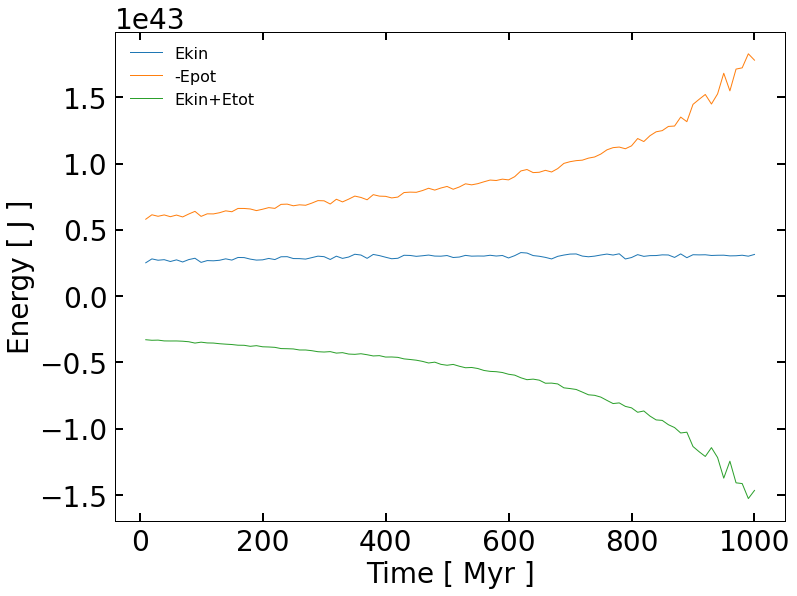

In [71]:
from test_stability_in_isolation import analyse_isolation
analyse_isolation(obs, "king")

In [73]:
import os
pngs = "/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_%4d.png"
ffmpeg = 'ffmpeg -y -r 3 -i "{}" {} -s "2000:2000" -an "test.mp4"'.format(
    pngs, "-profile:v high444 -level 4.1 -c:v libx264 -preset slow -crf 25")
print(ffmpeg)
os.system(ffmpeg)

ffmpeg -y -r 3 -i "/tidalshocks/out/ngc104/ngc104_king_isolation_1000_0.1_%4d.png" -profile:v high444 -level 4.1 -c:v libx264 -preset slow -crf 25 -s "2000:2000" -an "test.mp4"


0